![](http://www.traffic-tech.com/images/traffic_signals_urban_traffic_control_systems_banner.jpg)

# Logistic Regression

> The virtue of binary is that it's the simplest possible way of representing numbers. Anything else is more complicated. You can catch errors with it, it's unambiguous in its reading, there are lots of good things about binary. So it is very, very simple once you learn how to read it.

<footer>~ George M. Whitesides</footer>

![break](assets/agenda.png)

Onwards to classification problems! This is just like the regression problem, except that the values `y` we now want to predict take on only
a small number of discrete values. For now, we will focus on the binary
classification problem in which y can take on only two values, $0$ and $1$. (Most of what we say here will also generalize to the multiple-class case.) For instance, if we are trying to build a spam classifier for email, then  $x_i$ may be some features of a piece of email, and $y$ may be $1$ if it is a piece of spam mail, and $0$ otherwise. $0$ is also called the negative class, and $1$ the positive class, and they are sometimes also denoted by the symbols “-” and “+.” Given $x_i$, the corresponding $y_i$ is also called the label for the training example.

## Logistic Regression

In **linear regression**, we used a set of covariates to predict the value of a (continuous) outcome variable.
In **logistic regression**, we use a set of covariates to predict probabilities of (binary) class membership. These probabilities are then mapped to class labels, thus solving the classification problem.

Probability predictions look like this.

![](assets/logistic_regression.png)

* ** Y ** : Probability of belonging to class
* ** X ** : Value of independent variable

Probabilities are “snapped” to class labels (eg by threshholding at 50%).

![](assets/logistic_regression_snap.png)

Note that Logistic Regression is primarily used to solve a binary classification problem.

Examples:
* Was this credit transaction fraudulent? (Y/N)
* User a boy or a girl?
* Do I have x disease?
* Should this stock be bought or sold?

#### Why can't we just use a linear regression regression?

* Linear Regression models aren't limited to the range of {0,1}
* Linear Regression models don't reflect likelihood
* Linear Regression models don't result in probabilities

### The Logistic Regression Model

The 'logit' model solves these problems:

$$ln(p/(1-p)) = a + \beta X + \epsilon$$

where:

* $ln$ is the natural logarithm, $log_{exp}$, where $exp=2.71828…$
* $p$ is the probability that the event Y occurs, $p(Y=1)$
* $p/(1-p)$ is the "odds"
* $ln[p/(1-p)]$ is the log odds, or "logit"
* all other components of the model are the same.

 The _logarithm_ is the inverse operation to exponentiation. That means the logarithm of a number is the exponent to which another fixed value, the base, must be raised to produce that number.

### The log function

Any positive number, `y`, can be written as `10` raised to some power, `x`. We can write this relationship in equation form:

$$ y = 10^ x$$
    
For example it is obvious that 1000 can be written as $10^3$. It is not so obvious that $16$ can be written as $10^{1.2}$.

![](http://mathonweb.com/help_ebook/html/functions/functions59.gif)

We next define a function called the _logarithm_ that takes a number like 16 as input, calculates that it can be written as $10^{1.2}$, and returns the exponent $1.2$ as its output value. 

> **log(x)** (logarithm to the base 10) is defined as the function that takes any positive number x as input and returns the exponent to which the base 10 must be raised to obtain x. The domain of the log function is all positive real numbers and the range is all real numbers.

![](http://mathonweb.com/help_ebook/html/functions/functions60.gif)

An important feature of the log function is that it increases very slowly as x becomes very large. It describes nicely how the human ear percieves loud sounds and the way the human eye percieves bright lights.

We next define a function called the natural logarithm that takes a number like $5$ as input, calculates that it can be written as $e^{1.6}$, and returns the exponent $1.6$ as its output value.

![](http://mathonweb.com/help_ebook/html/functions/functions61a.gif)

> `ln(x)` is defined as the function that takes any positive number $x$ as input and returns the exponent to which the base $e$ must be raised to obtain $x$. ($e$ denotes the number 2.7182818284590…).  The domain of the ln function is all positive real numbers and the range is all real numbers.

![](http://mathonweb.com/help_ebook/html/functions/functions61b.gif)

All three of these curves are called exponential functions because the independent variable x is in the exponent. All three have the property that the higher up the curve you go the steeper they get. However $y = e ^x$ has the special property that **at every point along the curve the slope equals the height**. 

The exponential function is used to model a relationship in which a constant change in the independent variable gives the same proportional change (i.e. percentage increase or decrease) in the dependent variable.

### The logistic regression

The logistic regression model is simply a non-linear transformation of the linear regression. The "logistic" distribution is an S-shaped distribution function which is similar to the standard-normal distribution but easier to work with in most applications (the probabilities are easier to calculate). The logit distribution constrains the estimated probabilities to lie between 0 and 1.

For instance, the estimated probability is:

$$p = \frac{1}{1 + exp^{-(\alpha + \beta X)}}$$

![](assets/logistic_regression.png)

With this functional form:

* if you let $a + \beta X = 0$, then $p = .50$
* as $a + \beta X$ gets really big, p approaches 1
* as $a + \beta X$ gets really small, p approaches 0.

![](http://www.saedsayad.com/images/LogReg_1.png)

## Interpretation

### Odds and Probabilities

If there is a $ p$ probability of something happening, then the odds can be considered the number of successes you expect to get for every failure on average. High odds correspond to high probabilities, low odds to low probabilities. To calculate the odds:

$$ Odds = \frac{proportion of successes}{proportion of failures} = \frac{p}{1-p}$$

To go from odds back to probabilities:

$$Probability=\frac{Odds}{1+Odds}$$


While probabilities are bound to [0,1], odds are bound to [0,$ \infty$). Let's take the titanic example. What was the overall odds of survival on the Titanic. 38% of passengers survived the Titanic. Therefore:

$$ Odds_{survival} =\frac{0.38}{1-.38}=\frac{0.38}{0.62}=0.61 $$

 "For every one death on the Titanic, there was on average 0.61 survivors."

Let's see how the odds change across the range of the probability.

In [2]:
import pandas as pd
import numpy as np

pd.set_option('precision', 2)

probs = np.array([0, 0.01, 0.05, 0.1, 0.3333, 0.4, 0.5, 0.6, 0.6667, 0.75, 0.9, 0.95, 0.999])
odds = probs / (1 - probs)

prob_odds = pd.DataFrame([probs, odds]).T
prob_odds.columns = ['p','O']
prob_odds

,p,O
0,0.00,0.00
1,0.01,0.01
2,0.05,0.05
3,0.10,0.11
4,0.33,0.50
5,0.40,0.67
6,0.50,1.00
7,0.60,1.50
8,0.67,2.00
9,0.75,3.00


Odds Ratio is the ratio of two odds. If one odds is twice as big as the other, then we say the odds ratio is 2. If it is half again as big, the odds ratio would be `0.5`.

$$ OR=O_{1}/O_{2}=\frac{p_{1}}{1-p_{1}}/\frac{p_{2}}{1-p_{2}} $$

Let's go back to the Titanic example. Let's look at the odds ratio between men and women on the Titanic. 19% of men survived while 73% of women survived. Let's look at this as a bar graph.

![](assets/img240.png)

Now let's calculate the odds of survival for each group.

$$ Odds_{women} =\frac{0.73}{1-.73}=2.67 $$

$$ Odds_{men} =\frac{0.19}{1-.19}=0.24 $$

![](assets/img241.png)

The odds of survival for women is `2.67` and the odds of survival for men is `0.24`. The odds ratio is given by:

$$ OR =\frac{2.67}{0.24}=11 $$

> Women were eleven times as likely as men to survive the Titanic.

Let's look at some of our previous examples, where we have an odds ratio of 2.

In [155]:
OR2 = pd.DataFrame([[0.05, .052, .1004, 0.912, 18.24],
[0.1, .1111, .2222, 0.1818, 18.18],
[0.3333, 0.5, 1, 0.5, 1.5],
[0.5, 1, 2, 0.6667, 1.333],
[0.75, 3, 6, 0.857, 1.14],
[0.9, 9, 18, 0.947, 1.052],
[0.95, 19, 38, 0.974, 1.025],
[0.999, 999, 1998, 0.9995, 1.0005]], columns=['P1','O1','O2','P2','p2/p1'])
OR2

,P1,O1,O2,P2,p2/p1
0,0.0500,0.0520,0.1004,0.9120,18.2400
1,0.1000,0.1111,0.2222,0.1818,18.1800
2,0.3333,0.5000,1.0000,0.5000,1.5000
3,0.5000,1.0000,2.0000,0.6667,1.3330
4,0.7500,3.0000,6.0000,0.8570,1.1400
5,0.9000,9.0000,18.0000,0.9470,1.0520
6,0.9500,19.0000,38.0000,0.9740,1.0250
7,0.9990,999.0000,1998.0000,0.9995,1.0005


The odds ratios are constant here, but not the ratios of the probabilities directly. A doubling of the odds when the odds is already high doesn't have nearly the effect on the probability of doubling the odds when the odds is low. The relationship is reversed if we halve the odds.

Our interpretations of the parameters in the logistic regression model will be related to this odds ratio.

## Lab : Logistic Regression with StatsModels

Our goal will be to identify the various factors that may influence admission into graduate school.

The dataset contains several columns which we can use as predictor variables:

* `gpa`
* `gre` score
* `rank` or prestige of an applicant's undergraduate alma mater

The fourth column, `admit`, is our binary target variable. It indicates whether or not a candidate was admitted our not.

### Load the data

Load the data using `pandas.read_csv`. We now have a `DataFrame` and can explore the data.

In [ ]:
import pandas as pd
import statsmodels.api as sm
import pylab as pl
import numpy as np

# read the data in
df = pd.read_csv("http://www.ats.ucla.edu/stat/data/binary.csv")

In [3]:
# take a look at the dataset
print df.head()

   admit  gre   gpa  rank
0      0  380  3.61     3
1      1  660  3.67     3
2      1  800  4.00     1
3      1  640  3.19     4
4      0  520  2.93     4


In [7]:
# rename the 'rank' column because there is also a DataFrame method called 'rank'
df.columns = ["admit", "gre", "gpa", "prestige"]
print df.columns
# array([admit, gre, gpa, prestige], dtype=object)

Index([u'admit', u'gre', u'gpa', u'prestige'], dtype='object')


Notice that one of the columns is called "rank." This presents a problem since rank is also the name of a method belonging to pandas DataFrame (rank calculates the ordered rank (1 through n) of a DataFrame/Series). To make things easier, I renamed the rank column to "prestige".

### Summary Statistics & Looking at the data

A feature I really like in pandas is the pivot_table/crosstab aggregations. crosstab makes it really easy to do multidimensional frequency tables. You might want to play around with this to look at different cuts of the data.

In [76]:
# summarize the data
df.describe()

            admit         gre         gpa   prestige
count  400.000000  400.000000  400.000000  400.00000
mean     0.317500  587.700000    3.389900    2.48500
std      0.466087  115.516536    0.380567    0.94446
min      0.000000  220.000000    2.260000    1.00000
25%      0.000000  520.000000    3.130000    2.00000
50%      0.000000  580.000000    3.395000    2.00000
75%      1.000000  660.000000    3.670000    3.00000
max      1.000000  800.000000    4.000000    4.00000


In [ ]:
# take a look at the standard deviation of each column
df.std()

In [77]:
# frequency table cutting presitge and whether or not someone was admitted
print pd.crosstab(df['admit'], df['prestige'], rownames=['admit'])

prestige   1   2   3   4
admit                   
0         28  97  93  55
1         33  54  28  12


Histograms are often one of the most helpful tools you can use during the exploratory phase of any data analysis project. They're normally pretty easy to plot, quick to interpret, and they give you a nice visual representation of your problem.

In [18]:
%matplotlib inline
import seaborn as sns

/home/io/.tools/anaconda/envs/ds/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


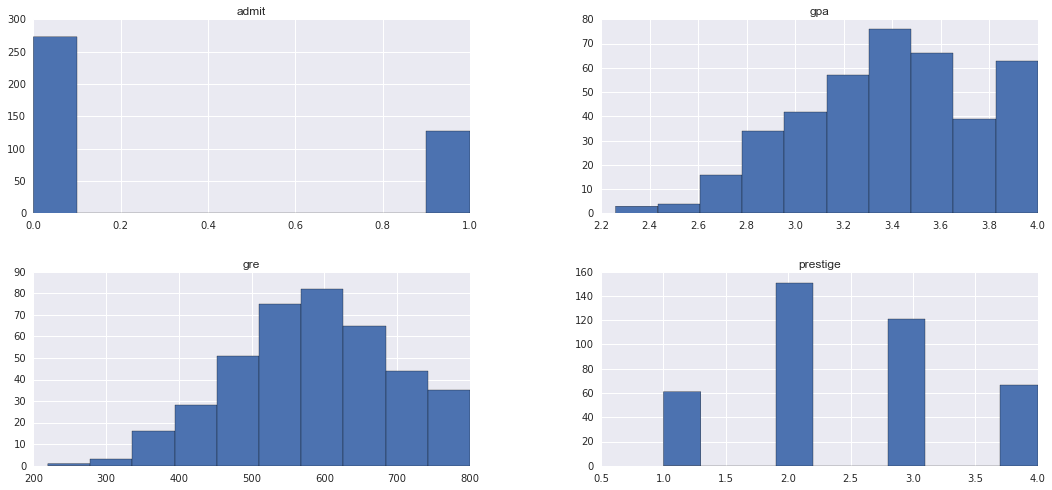

In [25]:
#plot all of the columns
df.hist(bins=10,figsize=(18,8));

### Dummy variables

`pandas` gives you a great deal of control over how categorical variables are represented. We're going dummify the `prestige` column using `get_dummies`.

`get_dummies` creates a new `DataFrame` with binary indicator variables for each category/option in the column specified. In this case, prestige has four levels: 1, 2, 3 and 4 (1 being most prestigious). When we call get_dummies, we get a dataframe with four columns, each of which describes one of those levels.

In [32]:
# dummify rank
dummy_ranks = pd.get_dummies(df['prestige'], prefix='prestige')

In [34]:
dummy_ranks.head()

,prestige_1,prestige_2,prestige_3,prestige_4
0,0,0,1,0
1,0,0,1,0
2,1,0,0,0
3,0,0,0,1
4,0,0,0,1


Once that's done, we merge the new dummy columns into the original dataset and get rid of the prestige column which we no longer need.

In [45]:
norm_feat = ['gre', 'gpa']
df[norm_feat] = (df[norm_feat] - df[norm_feat].mean()) / df[norm_feat].std()

In [46]:
feat = ['admit', 'gre', 'gpa']

In [47]:
data = df[feat].join(dummy_ranks.ix[:, 'prestige_2':])

In [48]:
data.head()

,admit,gre,gpa,prestige_2,prestige_3,prestige_4
0,0,-1.80,0.58,0,1,0
1,1,0.63,0.74,0,1,0
2,1,1.84,1.60,0,0,0
3,1,0.45,-0.53,0,0,1
4,0,-0.59,-1.21,0,0,1


Lastly we're going to add a constant term for our Logistic Regression. The statsmodels function we're going to be using requires that intercepts/constants are specified explicitly.

In [49]:
# manually add the intercept
data['intercept'] = 1.0

### Performing the regression

Actually doing the Logistic Regression is quite simple. Specify the column containing the variable you're trying to predict followed by the columns that the model should use to make the prediction.

In our case we'll be predicting the `admit` column using `gre`, `gpa`, and the `prestige` dummy variables `prestige_2`, `prestige_3` and `prestige_4`. We're going to treat `prestige_1` as our baseline and exclude it from our fit. This is done to prevent _multicollinearity_, or the dummy variable trap caused by including a dummy variable for every single category.

In [50]:
train_cols = data.columns[1:]
train_cols

Index([u'gre', u'gpa', u'prestige_2', u'prestige_3', u'prestige_4',
       u'intercept'],
      dtype='object')

Since we're doing a logistic regression, we're going to use the statsmodels Logit function. F

In [51]:
logit = sm.Logit(data['admit'], data[train_cols])

# fit the model
result = logit.fit()

Optimization terminated successfully.
         Current function value: 0.573147
         Iterations 6


### Interpreting the results

One of my favorite parts about statsmodels is the summary output it gives.

In [52]:
print result.summary()

                           Logit Regression Results                           
Dep. Variable:                  admit   No. Observations:                  400
Model:                          Logit   Df Residuals:                      394
Method:                           MLE   Df Model:                            5
Date:                Sat, 05 Dec 2015   Pseudo R-squ.:                 0.08292
Time:                        15:41:05   Log-Likelihood:                -229.26
converged:                       True   LL-Null:                       -249.99
                                        LLR p-value:                 7.578e-08
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
gre            0.2616      0.126      2.070      0.038         0.014     0.509
gpa            0.3060      0.126      2.423      0.015         0.058     0.553
prestige_2    -0.6754      0.316     -2.134      0.0

You get a great overview of the coefficients of the model, how well those coefficients fit, the overall fit quality, and several other statistical measures.

The result object also lets you to isolate and inspect parts of the model output. The confidence interval gives you an idea for how robust the coefficients of the model are.

In [53]:
# look at the confidence interval of each coeffecient
print result.conf_int()

               0     1
gre         0.01  0.51
gpa         0.06  0.55
prestige_2 -1.30 -0.06
prestige_3 -2.02 -0.66
prestige_4 -2.37 -0.73
intercept  -0.45  0.59


In this example, we're very confident that there is an inverse relationship between the probability of being admitted and the prestige of a candidate's undergraduate school.

In other words, the probability of being accepted into a graduate program is _higher_ for students who attended a top ranked undergraduate college (`prestige_1==True`) as opposed to a lower ranked school with, say, `prestige_4==True` (remember, a `prestige` of `1` is the most prestigious and a `prestige` of `4` is the least prestigious.

### odds ratio

Take the exponential of each of the coefficients to generate the odds ratios. This tells you how a 1 unit increase or decrease in a variable affects the odds of being admitted. For example, we can expect the odds of being admitted to decrease by about 50% if the prestige of a school is 2. UCLA gives a more in depth explanation of the odds ratio [here](http://www.ats.ucla.edu/stat/mult_pkg/faq/general/odds_ratio.htm).

In [60]:
# odds ratios only
print np.exp(result.params)

gre           1.30
gpa           1.36
prestige_2    0.51
prestige_3    0.26
prestige_4    0.21
intercept     1.07
dtype: float64


In [61]:
(0.75/0.25)/(0.25/0.75)

9.0

In [62]:
(0.25/0.75)/(0.75/0.25)

0.1111111111111111

We can also do the same calculations using the coefficients estimated using the confidence interval to get a better picture for how uncertainty in variables can impact the admission rate.

In [63]:
# odds ratios and 95% CI
params = result.params
conf = result.conf_int()
conf['OR'] = params
conf.columns = ['2.5%', '97.5%', 'OR']
print np.exp(conf)

            2.5%  97.5%    OR
gre         1.01   1.66  1.30
gpa         1.06   1.74  1.36
prestige_2  0.27   0.95  0.51
prestige_3  0.13   0.52  0.26
prestige_4  0.09   0.48  0.21
intercept   0.64   1.80  1.07


### Optional - Deeper Analysis

As a way of evaluating our classifier, we're going to recreate the dataset with every logical combination of input values. This will allow us to see how the predicted probability of admission increases/decreases across different variables.

We'll use a helper function, `cartesian`:

In [64]:
import numpy as np

def cartesian(arrays, out=None):
    """
    Generate a cartesian product of input arrays.

    Parameters
    ----------
    arrays : list of array-like
        1-D arrays to form the cartesian product of.
    out : ndarray
        Array to place the cartesian product in.

    Returns
    -------
    out : ndarray
        2-D array of shape (M, len(arrays)) containing cartesian products
        formed of input arrays.

    Examples
    --------
    >>> cartesian(([1, 2, 3], [4, 5], [6, 7]))
    array([[1, 4, 6],
           [1, 4, 7],
           [1, 5, 6],
           [1, 5, 7],
           [2, 4, 6],
           [2, 4, 7],
           [2, 5, 6],
           [2, 5, 7],
           [3, 4, 6],
           [3, 4, 7],
           [3, 5, 6],
           [3, 5, 7]])

    """

    arrays = [np.asarray(x) for x in arrays]
    dtype = arrays[0].dtype

    n = np.prod([x.size for x in arrays])
    if out is None:
        out = np.zeros([n, len(arrays)], dtype=dtype)

    m = n / arrays[0].size
    out[:,0] = np.repeat(arrays[0], m)
    if arrays[1:]:
        cartesian(arrays[1:], out=out[0:m,1:])
        for j in xrange(1, arrays[0].size):
            out[j*m:(j+1)*m,1:] = out[0:m,1:]
    return out

We're going to use `np.linspace` to create a range of values for `gre` and `gpa`. This creates a range of linearly spaced values from a specified min and maximum value--in our case just the min/max observed values.

In [65]:
# instead of generating all possible values of GRE and GPA, we're going
# to use an evenly spaced range of 10 values from the min to the max 
gres = np.linspace(data['gre'].min(), data['gre'].max(), 10)
print gres

[-3.18309405 -2.62521337 -2.06733268 -1.509452   -0.95157131 -0.39369063
  0.16419006  0.72207074  1.27995143  1.83783211]


In [66]:
gpas = np.linspace(data['gpa'].min(), data['gpa'].max(), 10)
print gpas

[-2.96899279 -2.46097856 -1.95296434 -1.44495011 -0.93693589 -0.42892167
  0.07909256  0.58710678  1.09512101  1.60313523]


In [67]:
# enumerate all possibilities
combos = pd.DataFrame(cartesian([gres, gpas, [1, 2, 3, 4], [1.]]))

In [68]:
# recreate the dummy variables
combos.columns = ['gre', 'gpa', 'prestige', 'intercept']
dummy_ranks = pd.get_dummies(combos['prestige'], prefix='prestige')
dummy_ranks.columns = ['prestige_1', 'prestige_2', 'prestige_3', 'prestige_4']

In [69]:
# keep only what we need for making predictions
cols_to_keep = ['gre', 'gpa', 'prestige', 'intercept']
combos = combos[cols_to_keep].join(dummy_ranks.ix[:, 'prestige_2':])

In [70]:
# make predictions on the enumerated dataset
combos['admit_pred'] = result.predict(combos[train_cols])
print combos.head()

    gre   gpa  prestige  intercept  prestige_2  prestige_3  prestige_4  \
0 -3.18 -2.97         1          1           0           0           0   
1 -3.18 -2.97         2          1           1           0           0   
2 -3.18 -2.97         3          1           0           1           0   
3 -3.18 -2.97         4          1           0           0           1   
4 -3.18 -2.46         1          1           0           0           0   

   admit_pred  
0        0.16  
1        0.09  
2        0.05  
3        0.04  
4        0.18  


Now that we've generated our predictions, let's make some plots to visualize the results. I created a small helper function called isolate_and_plot which allows you to compare a given variable with the different prestige levels and the mean probability for that combination. To isolate prestige and the other variable I used a pivot_table which allows you to easily aggregate the data.

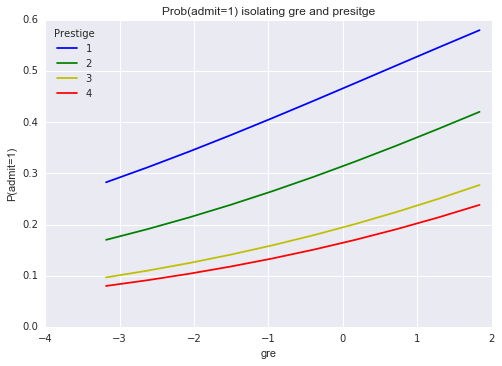

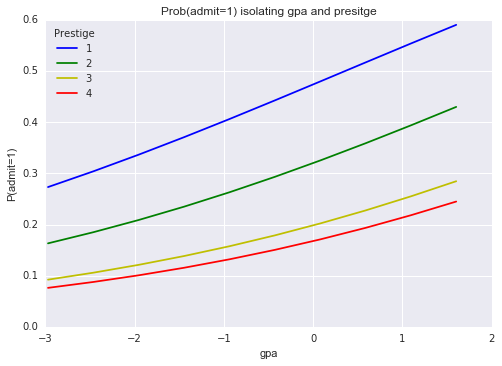

In [71]:
def isolate_and_plot(variable):
    # isolate gre and class rank
    grouped = pd.pivot_table(combos, values=['admit_pred'], index=[variable, 'prestige'],
                            aggfunc=np.mean)
    
    # in case you're curious as to what this looks like
    # print grouped.head()
    #                      admit_pred
    # gre        prestige            
    # 220.000000 1           0.282462
    #            2           0.169987
    #            3           0.096544
    #            4           0.079859
    # 284.444444 1           0.311718
    
    # make a plot
    colors = 'rbgyrbgy'
    for col in combos.prestige.unique():
        plt_data = grouped.ix[grouped.index.get_level_values(1)==col]
        pl.plot(plt_data.index.get_level_values(0), plt_data['admit_pred'],
                color=colors[int(col)])

    pl.xlabel(variable)
    pl.ylabel("P(admit=1)")
    pl.legend(['1', '2', '3', '4'], loc='upper left', title='Prestige')
    pl.title("Prob(admit=1) isolating " + variable + " and presitge")
    pl.show()

isolate_and_plot('gre')
isolate_and_plot('gpa')

The resulting plots shows how gre, gpa, and prestige affect the admission levels. You can see how the probability of admission gradually increases as gre and gpa increase and that the different prestige levels yield drastic probabilities of admission (particularly the most/least prestigious schools).

**Question : How is this different from the seaborn plot?**

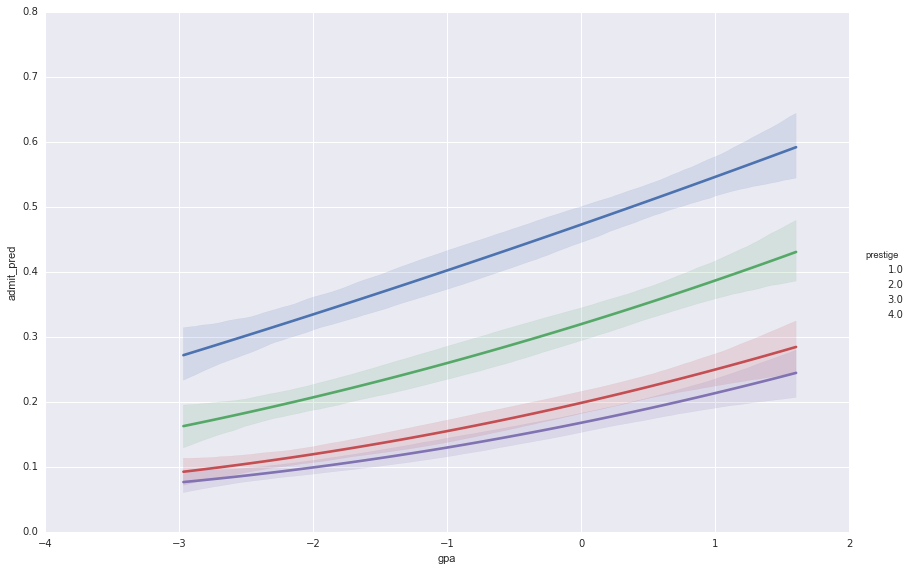

In [75]:
sns.lmplot('gpa','admit_pred',hue="prestige", truncate=True, markers=False, order=2, data=combos, size=8, aspect=1.5);

## Lab : Logistic Regression with ScitKit-learn

In [80]:
%matplotlib inline

import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.grid_search import GridSearchCV

In [109]:
plt?

Adapted from _Probabilistic-Programming-and-Bayesian-Methods-for-Hackers_, [Chapter 2](http://nbviewer.ipython.org/github/CamDavidsonPilon/Probabilistic-Programming-and-Bayesian-Methods-for-Hackers/blob/master/Chapter2_MorePyMC/MorePyMC.ipynb)

From in "[Visual and Statistical Thinking: Displays of Evidence for Making Decisions](http://www.edwardtufte.com/tufte/ebooks)":

>On January 28, 1986, the space shuttle Challenger exploded and seven astronauts died because two rubber O-rings leaked. These rings had lost their resiliency because the shuttle was launched on a very cold day. Ambient temperatures were in the low 30s and the O-rings themselves were much colder, less than 20F.

>One day before the flight, the predicted temperature for the launch was 26F to 29F. Concerned that the rings would not seal at such a cold temperature, the engineers who designed the rocket opposed launching Challenger the next day.

But they did not make their case persuasively, and were over-ruled by NASA.

![](assets/challenger4.jpg)

#### The image above shows the leak, where the O-ring failed.

### Challenger O-ring failure data

In [76]:
DATA_DIR = '../data/'

df = pd.read_csv(DATA_DIR + 'challenger_oring.csv', parse_dates=0, names=['date','temp','failure'], header=0).dropna()
df

,date,temp,failure
0,04/12/1981,66,0
1,11/12/1981,70,1
2,3/22/82,69,0
4,01/11/1982,68,0
5,04/04/1983,67,0
6,6/18/83,72,0
7,8/30/83,73,0
8,11/28/83,70,0
9,02/03/1984,57,1
10,04/06/1984,63,1


In [77]:
df = df[df.failure != 'Challenger Accident'].copy()

In [78]:
df['failure'] = df['failure'].astype(int)
df['temp'] = df['temp'].astype(int)
df['date'] = pd.to_datetime(df.date)
df

,date,temp,failure
0,1981-04-12,66,0
1,1981-11-12,70,1
2,1982-03-22,69,0
4,1982-01-11,68,0
5,1983-04-04,67,0
6,1983-06-18,72,0
7,1983-08-30,73,0
8,1983-11-28,70,0
9,1984-02-03,57,1
10,1984-04-06,63,1


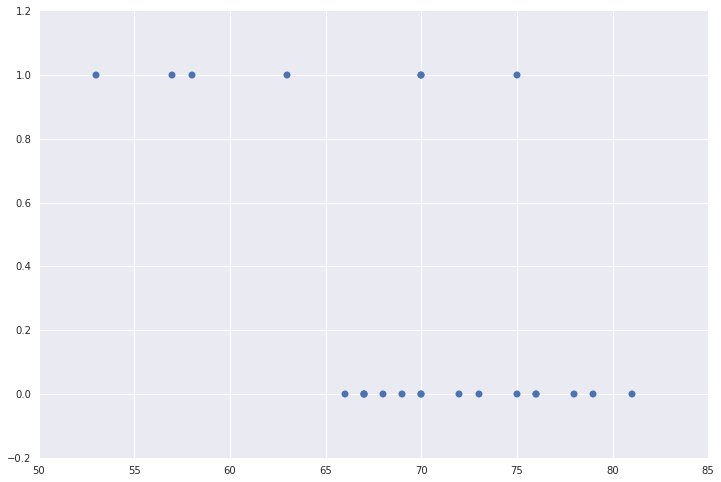

In [81]:
X = df.temp.values
y = df.failure.values
fig, axes = plt.subplots(1,1, figsize=(12, 8))
axes.set_ylim((-0.2, 1.2))
plt.plot(X, y, 'o');

## Try Linear Regression?

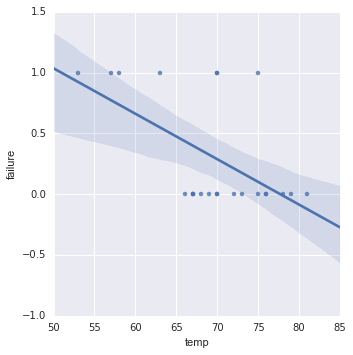

In [82]:
sns.lmplot('temp','failure', df);

A value of "1" represents failure. This plot has a classic sigmoid shape, so one might expect logistic regression to work. Furthermore, we do want to find the probability of failure and make predictions from there.

Logistic regression is carried out in the same way as linear. However, there is the "pesky" matter of setting the regularization co-efficient "C" 

The default C in sklearn is 1.The meaning of C is: the larger the C, the lesser the regularization. The smaller the C the higher the regularization.

What does regularization do? Larger regularizations penalize the values of regression coefficients. Smaller ones let the co-efficients range widely. Thus, larger C let the regression coefficients range widely. Scikit-learn bakes in two penalties: an L2 penalty which penalizes the sum of the squares of the coefficients, and an L1 penalty which penalizes the sum of the absolute values.

The reason for doing this is that is there are may be many co-variates we use for our prediction: we want to make sure we can get away with the simplest model that describes our data, even if that might increase the bias side of the bias-variance tradeoff a bit.

Remember here, though, that we have just two co-efficents: an intercept, and the outside temperature. So we do not expect to need regularization much. Indeed lets set C=1000.

### Using the Logistic Regression

In [83]:
reg=1000.
lr_clf = LogisticRegression(C=reg)
lr_clf.fit(X.reshape(-1,1), y)

LogisticRegression(C=1000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

Lets make predictions, get the associated probabilities, and plot them. We create a new grid of temperatures to evaluate our predictions at. Note that we do not do a test/train split: we have only 23 data points, but need to shut down the launch if there is any doubt. (One wishes...)

In [91]:
tempsnew = np.linspace(20., 90., 10)
tempsnew

array([ 20.        ,  27.77777778,  35.55555556,  43.33333333,
        51.11111111,  58.88888889,  66.66666667,  74.44444444,
        82.22222222,  90.        ])

In [97]:
probs = lr_clf.predict_proba(tempsnew.reshape(-1,1))[:, 1]
probs

array([ 0.99993492,  0.99964965,  0.99811646,  0.98994116,  0.94812614,
        0.77244192,  0.38666086,  0.10480957,  0.02128136,  0.00402205])

In [98]:
predicts = lr_clf.predict(tempsnew.reshape(-1,1))
predicts

array([1, 1, 1, 1, 1, 1, 0, 0, 0, 0])

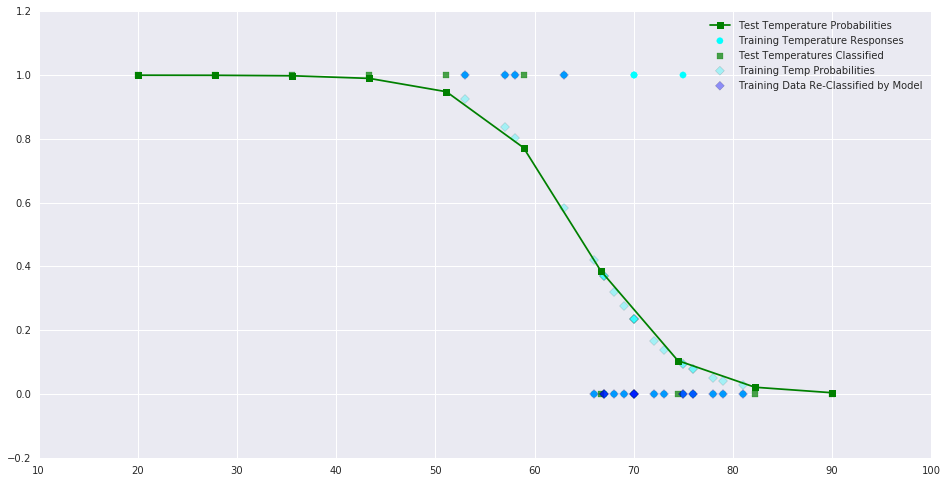

In [99]:
fig, axes = plt.subplots(1, 1, figsize=(16, 8))

# training data
plt.scatter(X, y, s=40, color='aqua', label="Training Temperature Responses") 

probs = lr_clf.predict_proba(tempsnew.reshape(-1,1))[:,1]
predicts = lr_clf.predict(tempsnew.reshape(-1,1))

# new test temps, as blue squares
plt.plot(tempsnew, probs, marker='s', color='green', label="Test Temperature Probabilities") 

# new test temps, scattered against the predictions, as green diamonds
plt.scatter(tempsnew, predicts, marker='s', color="green", s=30, alpha=0.7, label="Test Temperatures Classified") 

train_probs=lr_clf.predict_proba(X.reshape(-1,1))[:,1]
plt.scatter(X, train_probs, marker='D', c='aqua', alpha=0.3, s=40, label="Training Temp Probabilities") #

train_predicts=lr_clf.predict(X.reshape(-1,1))
plt.scatter(X, train_predicts, marker='D', c='b', alpha=0.4, s=40, label="Training Data Re-Classified by Model") #

axes.legend();

### Review predictions

We use pandas crosstab to write a table of prediction vs failure on the "training" set. As one might expect, the mislabellings come at the higher temperatures.

In [11]:
pd.crosstab(y, lr_clf.predict(X.reshape(-1,1)), rownames=["Actual"], colnames=["Predicted"])

Predicted,0,1
Actual,,
0,16,0
1,3,4


### Challenge : Setting the C-value

1. Carry out a Logistic Regression with scikit-learn's default value for C. Make a plot similar to the scatterplot above, and carry out the cross-tabulation. What happens?

### Logistic Regression with cross-validation

We now go ahead to the train/test split. Not once but multiple times, on a grid search, for different values of `C`. 

For each `C`, we:
1. create n_folds folds. Since the data size is 23 here, we roughly split the data into 5 folds of 4-5 values each, randomly.
1. We then train on 4 of these folds, test on the 5th
1. We average the results of all such combinations
1. We move on to the next value of C, and find the optimal value that minimizes mean square error.
1. We finally use that value to make the final fit.
1. Notice the structure of the GridSearchCV estimator in cv_optimize.

In [100]:
def fit_logistic(X_train, y_train, reg=0.0001, penalty="l2"):
    clf = LogisticRegression(C=reg, penalty=penalty)
    clf.fit(X_train, y_train)
    return clf

def cv_optimize(X_train, y_train, paramslist, penalty="l2", n_folds=10):
    clf = LogisticRegression(penalty=penalty)
    parameters = {"C": paramslist}
    gs = GridSearchCV(clf, param_grid=parameters, cv=n_folds)
    gs.fit(X_train, y_train)
    return gs.best_params_, gs.best_score_

def cv_and_fit(X_train, y_train, paramslist, penalty="l2", n_folds=5):
    bp, bs = cv_optimize(X_train, y_train, paramslist, penalty=penalty, n_folds=n_folds)
    print "BP: %s, BS: %s" % (bp, bs)
    clf = fit_logistic(X_train, y_train, penalty=penalty, reg=bp['C'])
    return clf

#### Model Parameters & Score

In [102]:
np.logspace(-4, 5, num=100)

array([  1.00000000e-04,   1.23284674e-04,   1.51991108e-04,
         1.87381742e-04,   2.31012970e-04,   2.84803587e-04,
         3.51119173e-04,   4.32876128e-04,   5.33669923e-04,
         6.57933225e-04,   8.11130831e-04,   1.00000000e-03,
         1.23284674e-03,   1.51991108e-03,   1.87381742e-03,
         2.31012970e-03,   2.84803587e-03,   3.51119173e-03,
         4.32876128e-03,   5.33669923e-03,   6.57933225e-03,
         8.11130831e-03,   1.00000000e-02,   1.23284674e-02,
         1.51991108e-02,   1.87381742e-02,   2.31012970e-02,
         2.84803587e-02,   3.51119173e-02,   4.32876128e-02,
         5.33669923e-02,   6.57933225e-02,   8.11130831e-02,
         1.00000000e-01,   1.23284674e-01,   1.51991108e-01,
         1.87381742e-01,   2.31012970e-01,   2.84803587e-01,
         3.51119173e-01,   4.32876128e-01,   5.33669923e-01,
         6.57933225e-01,   8.11130831e-01,   1.00000000e+00,
         1.23284674e+00,   1.51991108e+00,   1.87381742e+00,
         2.31012970e+00,

In [101]:
clf=cv_and_fit(X.reshape(-1,1), y, np.logspace(-4, 5, num=100))

BP: {u'C': 1232.8467394420659}, BS: 0.869565217391


#### Confusion Matrix

In [103]:
pd.crosstab(y, clf.predict(X.reshape(-1,1)), rownames=["Actual"], colnames=["Predicted"])

Predicted,0,1
Actual,,
0,16,0
1,3,4


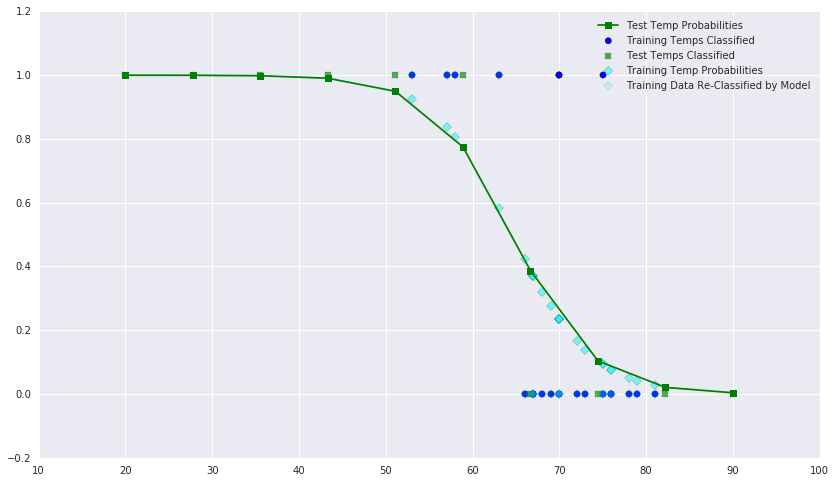

In [104]:
fig, axes = plt.subplots(1,1, figsize=(14, 8))
plt.scatter(X, y, s=40, label="Training Temps Classified")
axes=plt.gca()
probs=clf.predict_proba(tempsnew.reshape(-1,1))[:,1]
predicts=clf.predict(tempsnew.reshape(-1,1))
plt.plot(tempsnew, probs, marker='s', color='green', label="Test Temp Probabilities")
plt.scatter(tempsnew, predicts, marker='s', color="green", s=40, alpha=0.64, label="Test Temps Classified")
train_probs=clf.predict_proba(X.reshape(-1,1))[:,1]
plt.scatter(X, train_probs, marker='D', c='aqua', alpha=0.5, s=40, label="Training Temp Probabilities")
train_predicts=clf.predict(X.reshape(-1,1))
plt.scatter(X, train_predicts, marker='D', c='aqua', alpha=0.2, s=40, label="Training Data Re-Classified by Model")
axes.legend();

We note that the true story was even worse than our data made it out to be! We did not take the severity of the incidents into account. **How could we have incorporated this severity into our analysis?** *(the following images images are taken from Tufte's booklet).*

![](assets/challenger-report.png)

![](assets/challenger-report2.png)

### Take Aways

Logistic Regression is an excellent algorithm for classification. Even though some of the sexier, black box classification algorithms like SVM and RandomForest can perform better in some cases, it's hard to deny the value in knowing exactly what your model is doing. Often times you can get by using RandomForest to select the features of your model and then rebuild the model with Logistic Regression using the best features.

![break](assets/voronoi.png)

## Classwork

Implement [this blog article](http://dataillumination.blogspot.hk/2015/03/predicting-flights-delay-using.html) predicting flights in Python.

In [107]:
import matplotlib.pyplot as plt
import matplotlib as m
m.__version__

'1.5.0'

![break](assets/resources.png)

## Resources

* [Regression Analysis by Example](http://type.hk:2551/calibre/browse/book/294) (**Chapter 12**) - Samprit Chatterjee
* [Overview with plots of statistical distributions](http://nbviewer.ipython.org/urls/gist.github.com/mattions/6113437/raw/c5468ea930d6960225d83e112d7f3d00d9c13398/Exploring+different+distribution.ipynb)